In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

close all
clear all
clc

r=load('ricker2.txt');
% plot(r)

imp=zeros(2001,1);
i1=10; i2=1800;

imp(i1)=1;
imp(i2)=1;
for i=1:50
    if rand<=0.7
        imp=zeros(2001,1);
        i1=200; i2=1800;
        rn1=randi([0 80]);
        rn2=randi([-80 300]);
        i1=i1+rn1;
        i2=i2+rn2;
        imp(i1)=1;
        imp(i2)=1;
    end
[syn1,lag]=xcorr(r,imp);
h=plot(syn1,lag); xlim([-0.5 1])
ht=text(.8,.8,.8,num2str(i));
pause (1)
delete(h)
delete(ht);
end

h=plot(syn1,lag/2);xlim([-0.5 1]);


In [14]:
ricker = []
with open("ricker2.txt", "r") as f:
    for line in f:
        ricker.append(float(line.strip("\n")))
ricker = np.array(ricker)

[ -0.00000000e+000  -0.00000000e+000  -0.00000000e+000  -0.00000000e+000
  -0.00000000e+000  -0.00000000e+000  -0.00000000e+000  -1.54338517e-313
  -7.28139980e-299  -1.53314176e-284  -1.44062614e-270  -6.04080087e-257
  -1.13027088e-243  -9.43590350e-231  -3.51449441e-218  -5.83960062e-206
  -4.32816233e-194  -1.43080188e-182  -2.10941625e-171  -1.38675077e-160
  -4.06470503e-150  -5.31115720e-140  -3.09319136e-130  -8.02789875e-121
  -9.28293055e-112  -4.78141318e-103  -1.09673731e-094  -1.11994450e-086
  -5.08970599e-079  -1.02902282e-071  -9.25128357e-065  -3.69659251e-058
  -6.56091045e-052  -5.16872393e-046  -1.80590330e-040  -2.79549217e-035
  -1.91486850e-030  -5.79526939e-026  -7.73442791e-022  -4.54079797e-018
  -1.16890413e-014  -1.31360824e-011  -6.40510132e-009  -1.34289913e-006
  -1.19371558e-004  -4.39200309e-003  -6.38140403e-002  -3.25467274e-001
  -3.28303549e-001   7.22097584e-001   7.22097584e-001  -3.28303549e-001
  -3.25467274e-001  -6.38140403e-002  -4.39200309e-

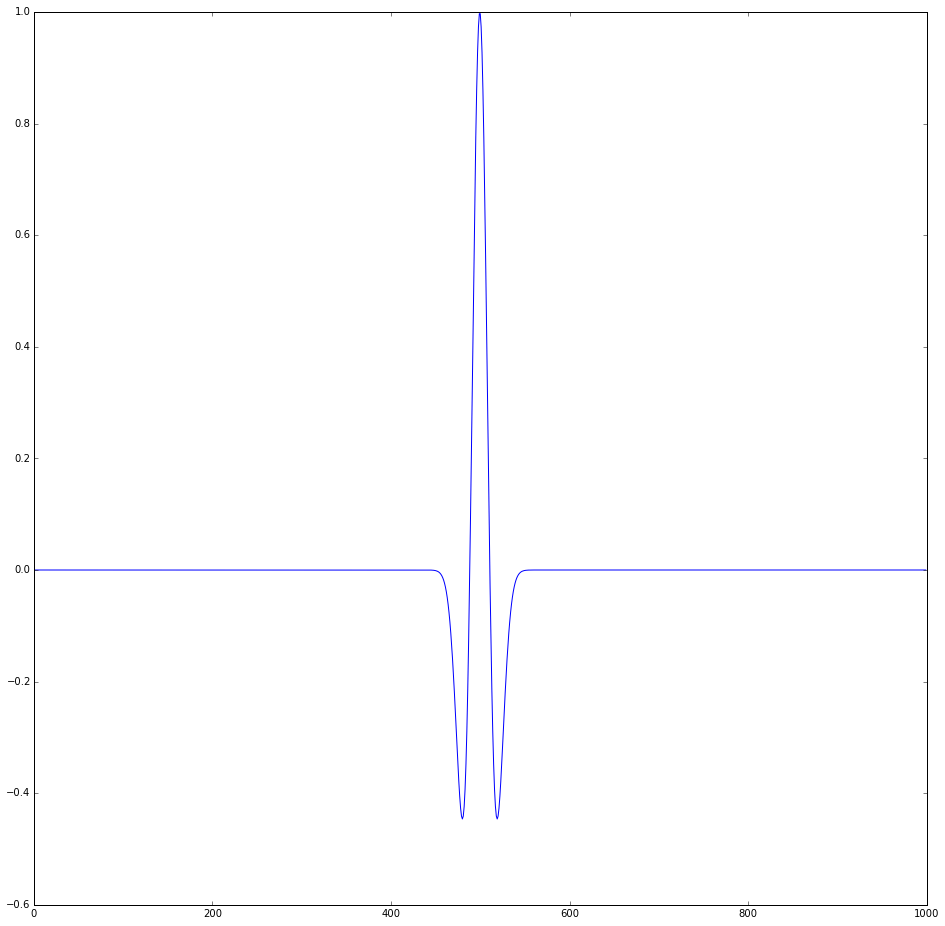

In [29]:
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)
ricker = ricker_wavelet_analytical(20.)
print ricker
resolution = 1000
ax.plot(range(resolution), ricker_wavelet_analytical(20., resolution=1000))
plt.show()

In [13]:
imp = np.zeros(2001)
print imp.shape
i1=10
i2=1800

imp[i1]=1
imp[i2]=1
print imp

(2001,)
[ 0.  0.  0. ...,  0.  0.  0.]


In [30]:

print xcross

[ 0.  0.  0. ...,  0.  0.  0.]


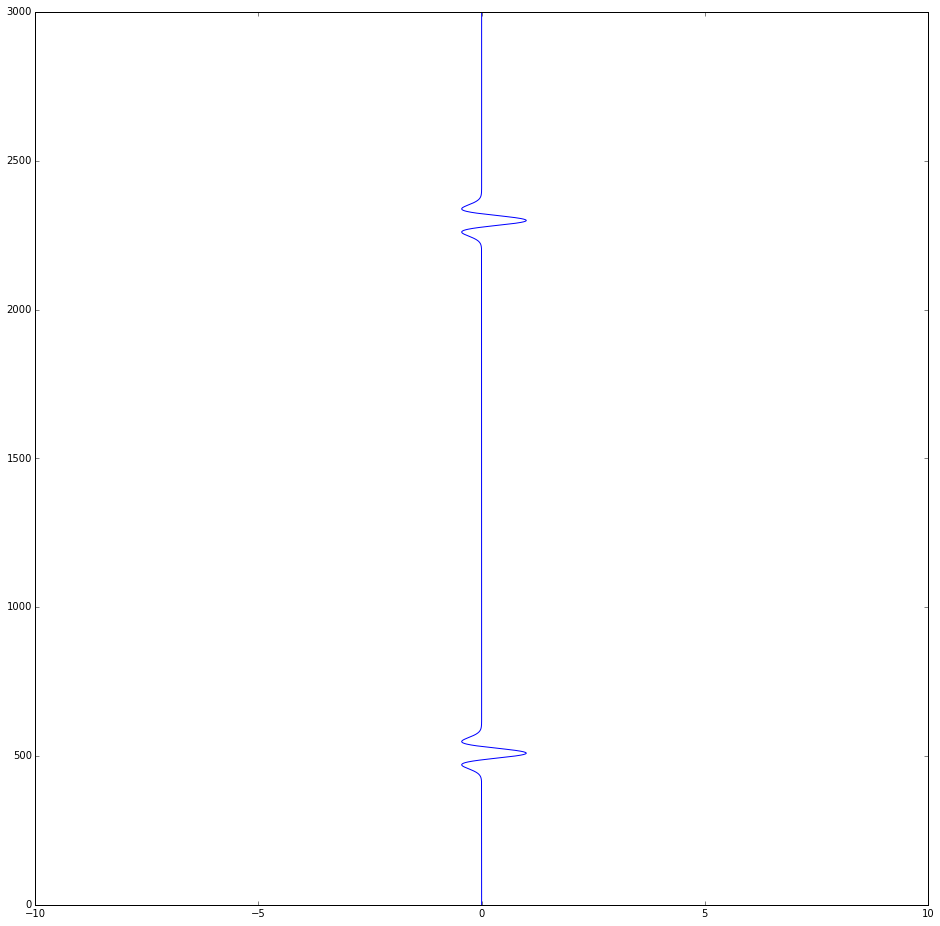

In [34]:
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)

ricker = ricker_wavelet_analytical(10., resolution=1000)
xcross = np.convolve(ricker, imp)

ax.plot(xcross, range(len(xcross)))
ax.set_xlim(-10, 10)
plt.show()

In [58]:
def ricker_wavelet_analytical(frequency=10., position=0.5, resolution=1000):
    time = np.linspace(0, 1.0, resolution)
    time_pow = np.power(time-position, 2)
    ricker=np.multiply(1-2*np.pi**2*frequency**2.*time_pow, np.exp(-np.pi**2*frequency**2.*time_pow))
    return ricker

def ricker_wavelet():
    ricker = []
    with open("ricker2.txt", "r") as f:
        for line in f:
            ricker.append(float(line.strip("\n")))
    return np.array(ricker)

def create_impedance_vector(positions, values, dim, noise=None):
    impedance_values = np.zeros(dim)
    if noise is not None:
        impedance_values = np.add(impedance_values, noise)
    
    for position, value in zip(positions, values):
        impedance_values[position] = value
    return impedance_values

def create_trace(wavelet, impedance):
    print wavelet.shape, impedance.shape
    return np.convolve(wavelet, impedance)

(1000,) (800,)
(1000,) (800,)
(1799,)


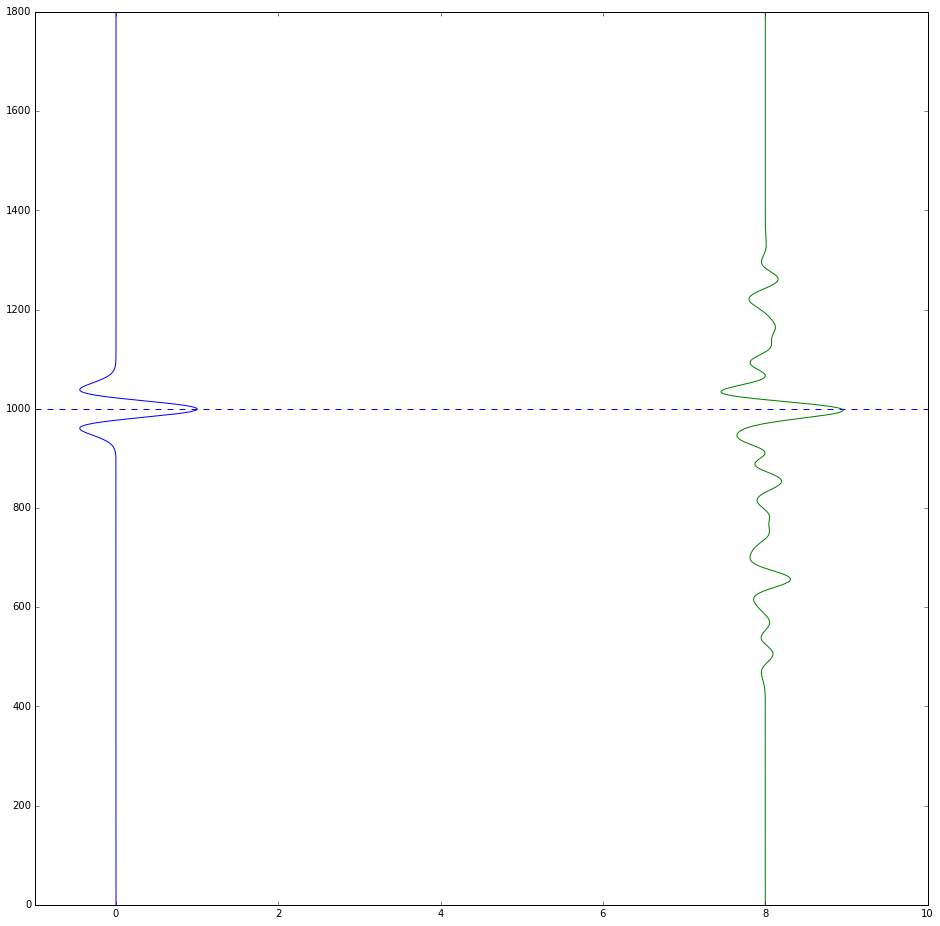

In [72]:
dimensions = 800

fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)

impedance = create_impedance_vector([500], [1], dimensions, noise=np.random.uniform(low=-0.05, high=0.05, size=dimensions))

impedance_ref = create_impedance_vector([500], [1], dimensions, noise=None)

ricker = ricker_wavelet_analytical()
trace = create_trace(ricker, impedance)
trace_ref = create_trace(ricker, impedance_ref)
print trace.shape
ax.plot(trace_ref, range(len(trace_ref)))
ax.plot(trace+8,range(len(trace))) 
ax.axhline(1000, linestyle="--")
ax.set_xlim(-1, 10)
plt.show()